In [1]:
import sys
from collections import OrderedDict
import matplotlib.pyplot as plt
import parselmouth
import re
import pandas as pd

import librosa
import numpy as np

In [2]:
def run_script_with_pluseq(init_script):
    script = init_script

    to_include = True
    while to_include:
        match = re.search(r'^include ((?:\w|\.)+)', script, re.MULTILINE)
        if match:
            with open(match.group(1)) as f:
                script = script[:match.start()] + f.read() + '\n' + script[match.end():]
        else:
            to_include = False

    script = re.sub(r'((?:\w|\.)+\$)\s*\+=', r'\1 = \1 +', script)
    parselmouth.praat.run(script)

In [3]:
# name = "hindi_20s"
# name = "telugu_15s"
num = 2
name = "telugu_para"+str(num)
csv_name = "./csv_files_VOPs/para_"+str(num)+".csv"

In [4]:
# #MAIN

# if len(sys.argv) < 2:
# print("Error! Give argument: input_file.wav")#wavfile_data.txt wavfile_profile_data.txt")
# sys.exit(0)

# file_in = sys.argv[1]

wav_file =name+".wav"
file_in = './wav_files/'+wav_file
init_script = 'include prosomain.praat\n'
init_script += 'call prosogram file=' + file_in + ' save=yes draw=no\n'
init_script += 'exit'

run_script_with_pluseq(init_script) #Generate data and profile_data files using prosogram in praat

Batch mode...
 
Batch command prosogram
Processing input file <telugu_para2>...
Selected optimal segmentation method: asyll
Analysis time range: 0 - 66.471 s (1 min, 6.471 s)
Reading parameter files...
Consulted pitch from file <./wav_files/telugu_para2.Pitch> (time step=0.005)
Consulted BP intensity from file <./wav_files/telugu_para2_BP.Intensity> (time step=0.005)
Calculating parameters...
Segmentation into syllabic nuclei. Method=asyll, Time range=0-66.471
Calculating actual segmentation. Method=asyll...
Detecting hesitations (method=automatic)...
Calculating stylization... (asyll, G(adapt)=0.16-0.32/T^2, DG=30, dmin=0.035)
Calculating stylization... Ready
No speaker tier in input textgrid. Assuming 1 speaker.
Calculating pitch range of each speaker...
Calculating pitch range normalized pitch...
Writing prosodic profile report for current input file to: ./wav_files/telugu_para2_profile.txt
Writing prosodic profile of current input file to: ./wav_files/telugu_para2_profile_data.txt


In [5]:
#Now using the datafiles for patterns

datafile_in = file_in[:-4] + "_data.txt" #removing ".wav"
profile_in = file_in[:-4] + "_profile_data.txt"

f = open(datafile_in)

text = f.read()
lines = text.split('\n')

new_lines = []

for line in lines:
    split_line = line.split('\t')
    new_lines.append(split_line)
#     print(split_line)
#     print("--")
    
row_label_index = new_lines[0].index("rowLabel")
nucl_t1_index = new_lines[0].index("nucl_t1")
nucl_t2_index = new_lines[0].index("nucl_t2")
f0_start_index = new_lines[0].index("f0_start")
f0_end_index = new_lines[0].index("f0_end")

f.close()
data_dict = {}
for i, header in enumerate(new_lines[0]):
#     print(len(new_lines[1:][-2]))
    data_dict[header] = [row[i] for row in new_lines[1:-1]]

data_wav = pd.DataFrame(data_dict)
print(data_wav.columns)

max_time =data_wav["nucl_t1"][len(data_wav)-1]
# print(max_time)
# print(max_time.find('.'))
i = max_time.find('.')+7
# print(i)
data_wav["nucl_t1"]=data_wav["nucl_t1"].str[:i]
# data_wav["nucl_t1"]=pd.to_numeric(data_wav["nucl_t1"])
data_wav["nucl_t2"]=data_wav["nucl_t2"].str[:i]
# data_wav["nucl_t2"]=pd.to_numeric(data_wav["nucl_t2"])
data_wav = data_wav.apply(pd.to_numeric)

Index(['rowLabel', 'nucl_t1', 'nucl_t2', 'f0_min', 'f0_max', 'f0_median',
       'f0_mean', 'f0_meanST', 'f0_start', 'f0_end', 'lopitch', 'hipitch',
       'hipitchST', 'dynamic', 'intrasyllab', 'intersyllab', 'up', 'down',
       'trajectory', 'f0_discont', 'prnp_start', 'prnp_end', 'prnp_intra',
       'nucl_dur', 'syll_dur', 'vowel_dur', 'rhyme_dur', 'gap_left',
       'loudness', 'int_peak', 'hesitation', 'speaker_id', 'before_pause',
       'after_pause', 'pause_dur', 'iso_dur'],
      dtype='object')


In [6]:
li=['rowLabel', 'nucl_t1', 'nucl_t2', 'f0_min', 'f0_max', 'f0_median','f0_mean', 'f0_meanST', 'f0_start', 'f0_end']
data_wav[li]

,rowLabel,nucl_t1,nucl_t2,f0_min,f0_max,f0_median,f0_mean,f0_meanST,f0_start,f0_end
0,0.535,0.535408,0.610408,96,115,109,108,81.19,109,109
1,0.695,0.695408,0.730408,90,111,107,106,80.83,107,107
2,0.895,0.895408,0.925408,92,94,93,93,78.53,93,93
3,1.025,1.025408,1.065408,84,103,94,93,78.59,94,94
4,1.255,1.255408,1.345408,88,95,91,91,78.16,91,91
...,...,...,...,...,...,...,...,...,...,...
294,65.225,65.225408,65.265408,71,93,87,87,77.37,87,87
295,65.385,65.385408,65.455408,79,113,90,91,78.13,113,84
296,65.620,65.620408,65.700408,73,99,83,84,76.90,99,73
297,65.760,65.760408,65.800408,81,101,88,89,77.71,88,88


In [7]:
fp = open(profile_in)

text = fp.read()

lines = text.split('\n')

new_profile_lines = []

for line in lines:
    split_line = line.split('\t')
    new_profile_lines.append(split_line)
#     print(split_line)
#     print("--")

speech_rate = new_profile_lines[1][new_profile_lines[0].index("SpeechRate")]
speech_time = new_profile_lines[1][new_profile_lines[0].index("SpeechTime")]
f0_mean = float(new_profile_lines[1][new_profile_lines[0].index("F0MeanHz")])
pitch_top = float(new_profile_lines[1][new_profile_lines[0].index("PitchTopHz")])
pitch_bottom = float(new_profile_lines[1][new_profile_lines[0].index("PitchBottomHz")])

fp.close()

temp = "SpeechRate, SpeechTime, F0MeanHz, PitchBottomHz, PitchTopHz"
li = temp.split(", ")

data_dict = {}
for i, header in enumerate(new_profile_lines[0]):
#     print(len(new_lines[1:][-2]))
    data_dict[header] = [row[i] for row in new_profile_lines[1:-1]]

profile_wav = pd.DataFrame(data_dict)
profile_wav[li] = profile_wav[li].apply(pd.to_numeric)
profile_wav[li]

,SpeechRate,SpeechTime,F0MeanHz,PitchBottomHz,PitchTopHz
0,7.311,65.915,113,76,171.5


In [8]:
y,fs = librosa.load('./wav_files/'+wav_file)
print(len(y)/fs)

66.47083900226757


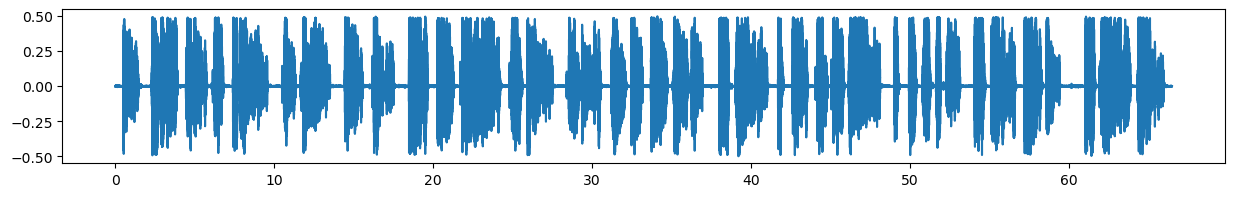

In [9]:
t = np.linspace(0,len(y)/fs,len(y),endpoint=False)
plt.figure(figsize=(15,2))
plt.plot(t,y);
plt.savefig(("./plots/"+name+"_waveform.png"), dpi=300,bbox_inches='tight')

In [10]:
tmin = np.abs(t[0]-t[1])
tmin
nucl_t1_sample = []
for i in range(len(data_wav)):
    temp = np.where(np.abs(t - data_wav['nucl_t1'][i]) < tmin*0.5)
    nucl_t1_sample.append(temp[0][0])
nucl_t2_sample = []
for i in range(len(data_wav)):
    temp = np.where(np.abs(t - data_wav['nucl_t2'][i]) < tmin*0.5)
    nucl_t2_sample.append(temp[0][0])
#     print(temp[0][0])
    # print(data_wav['nucl_t1'][3])

In [11]:
values = np.copy(data_wav['f0_start'])
scaled_values = (values - values.min()) / (values.max() - values.min())
values = np.copy(data_wav['f0_end'])
scaled_values_end = (values - values.min()) / (values.max() - values.min())

In [12]:
len(t)

1465682

In [13]:
# t_coma =[2.3,5.8,13,15.8,18.7,21.2]
# t_fullstop=[3.8,8.2,22.8]
# coma_sample=[]
# for i in t_coma:
#     print(i)
#     temp = np.where(np.abs(t - i) < tmin)
#     coma_sample.append(temp[0][0])
# fullstop_sample=[]
# for i in t_fullstop:
#     temp = np.where(np.abs(t - i) < tmin*0.5)
#     fullstop_sample.append(temp[0][0])
# #     print(temp[0][0])
# #     nucl_t1_sample.append(temp[0][0])

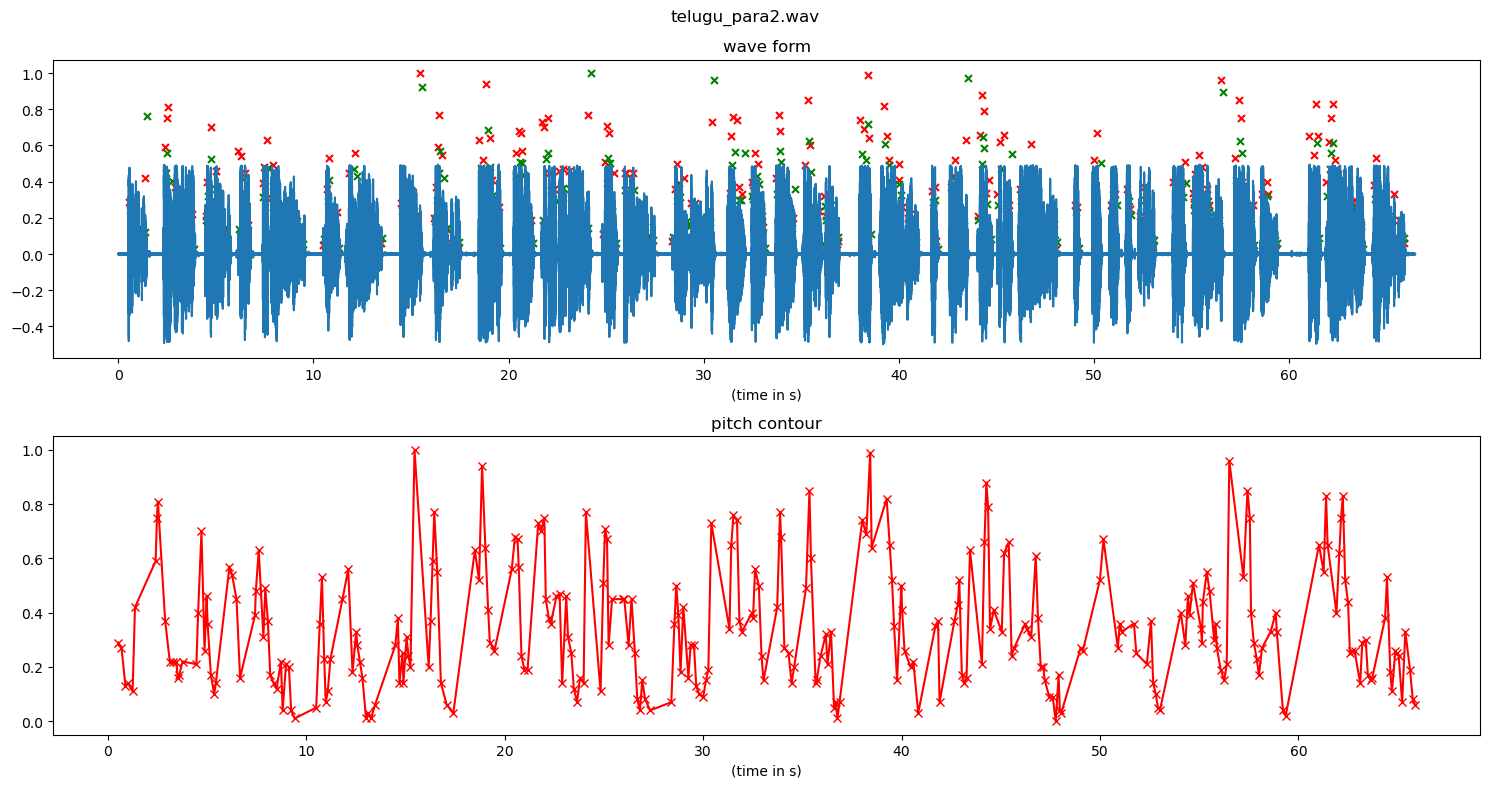

In [14]:
fig,ax = plt.subplots(2,1,figsize=(15,8))
ax[0].plot(t,y)
ax[0].scatter(t[nucl_t1_sample],scaled_values,color='red', marker='x', s=25);
ax[0].scatter(t[nucl_t2_sample],scaled_values_end,color='green', marker='x', s=25);

# ax[0].scatter(t[coma_sample],np.ones(len(t_coma))*(-1),color='green', marker='1', s=100);
# ax[0].scatter(t[fullstop_sample],np.ones(len(t_fullstop))*(-1),color='black', marker='8', s=100);

# ax[0].legend(['Line', 'F0', 'Comma', 'Full Stop'], loc='upper right')
ax[0].set_title("wave form")
ax[0].set_xlabel("(time in s)")

ax[1].plot(t[nucl_t1_sample],scaled_values,color='red', marker='x');
# ax[1].scatter(t[coma_sample],np.zeros(len(t_coma))*(-1),color='green', marker='1', s=100);
# ax[1].scatter(t[fullstop_sample],np.zeros(len(t_fullstop))*(-1),color='black', marker='8', s=100);
# ax[1].legend(['F0', 'Comma', 'Full Stop'], loc='upper right');
ax[1].set_title("pitch contour")
ax[1].set_xlabel("(time in s)")

plt.suptitle(wav_file)
plt.tight_layout()

plt.savefig("./plots/" + name + "_pitchContour.png", dpi=300,bbox_inches='tight')
plt.show() 

In [15]:
def comparison(f0_value, pitch_top, pitch_bottom, f0_mean):
    L_value = abs(f0_value - pitch_bottom)
    M_value = abs(f0_value - f0_mean)
    H_value = abs(f0_value - pitch_top)

    if L_value <= M_value and L_value < H_value:
        return "L"
    elif M_value < L_value and M_value <= H_value:
        return "M"
    else:
        return "H"

In [16]:
#Getting L,H,M from data

new_lines = new_lines[1:] #remove header

labelled_rows = OrderedDict()

for row in new_lines:
    if len(row) > 1:
        #print("row_label:", row[row_label_index])
        #print("f0_start:", row[f0_start_index])
        #print("f0_end:", row[f0_end_index])

        label = row[row_label_index]
        f0_start = float(row[f0_start_index])
        f0_end = float(row[f0_end_index])
        #nucl_t1 = float(row[nucl_t1_index])
        #nucl_t2 = float(row[nucl_t2_index])


        if f0_start == f0_end:
            result_pitch = comparison(f0_start, pitch_top, pitch_bottom, f0_mean)
            #print(result_pitch)
            labelled_rows[label] =  result_pitch#, nucl_t1, nucl_t2]

        else:
            start_label = comparison(f0_start, pitch_top, pitch_bottom, f0_mean)
            end_label = comparison(f0_end, pitch_top, pitch_bottom, f0_mean)
            result_pitch = start_label + "-" + end_label
            #print(result_pitch)
            labelled_rows[label] =  result_pitch#, nucl_t1, nucl_t2]

print(labelled_rows)

OrderedDict([('0.535', 'M'), ('0.695', 'M'), ('0.895', 'L'), ('1.025', 'L'), ('1.255', 'L'), ('1.375', 'M-H'), ('2.415', 'M'), ('2.480', 'H'), ('2.530', 'H-M'), ('2.895', 'M'), ('3.130', 'M'), ('3.290', 'M'), ('3.460', 'M'), ('3.525', 'M'), ('3.605', 'M'), ('3.770', 'M-L'), ('4.470', 'M'), ('4.555', 'M'), ('4.725', 'H'), ('4.880', 'M'), ('4.985', 'M'), ('5.035', 'M'), ('5.200', 'M'), ('5.365', 'L'), ('5.450', 'L'), ('6.135', 'M-L'), ('6.265', 'M'), ('6.490', 'M-L'), ('6.670', 'M-L'), ('7.420', 'M'), ('7.465', 'M'), ('7.610', 'H'), ('7.845', 'M'), ('7.940', 'M'), ('8.070', 'M'), ('8.190', 'M'), ('8.360', 'L'), ('8.510', 'L'), ('8.730', 'M'), ('8.815', 'L'), ('8.985', 'M'), ('9.130', 'M'), ('9.245', 'L'), ('9.415', 'L'), ('10.505', 'L'), ('10.685', 'M'), ('10.795', 'M'), ('10.910', 'M'), ('10.990', 'L'), ('11.090', 'L'), ('11.225', 'M-L'), ('11.830', 'M-M'), ('12.120', 'M'), ('12.335', 'M'), ('12.520', 'M'), ('12.580', 'M'), ('12.710', 'M'), ('12.835', 'M'), ('13.020', 'L'), ('13.105', '

In [17]:
# def compare_labels(last_pitch, pitch_label):
#     if last_pitch == pitch_label:
#         return True
#     elif (last_pitch == 'L-L' and pitch_label == 'L') or (last_pitch == 'L' and pitch_label == 'L-L'):
#         return True
#     elif (last_pitch == 'M-M' and pitch_label == 'M') or (last_pitch == 'M' and pitch_label == 'M-M'):
#         return True
#     elif (last_pitch == 'H-H' and pitch_label == 'H') or (last_pitch == 'H' and pitch_label == 'H-H'):
#         return True
#     else:
#         return False

In [18]:
# #PREDICTION

# prediction = ""

# print("Time", "\t", "Label", "\t", "Trend", "\t", "Prediction")

# trend = 0 #-1 when trend is down, +1 when trend is up
# last_pitch = ''

# count = 0

# trend_count = 0

# last_trend = 0
# prev_prediction=""
# for i in labelled_rows:
#     #FULL-STOP PREDICTION
#     pitch_label = labelled_rows[i]
    
#     if count == 0:
#         last_pitch = pitch_label

#     if last_pitch == 'L' and (pitch_label == 'M' or pitch_label == 'H'):
#         trend = 1
#     elif last_pitch == 'M' and pitch_label == 'H':
#         trend = 1
#     elif last_pitch == 'M' and pitch_label == 'L':
#         trend = -1
#     elif last_pitch == 'H' and (pitch_label == 'M' or pitch_label == 'L'):
#         trend = -1
#     elif (last_pitch == 'L-M' or  last_pitch == 'M-H' or last_pitch == 'L-H') and pitch_label == 'L':
#         trend = -1
#     elif last_pitch  == 'M-H' and pitch_label == 'M':
#         trend = -1
#     elif (last_pitch == 'H-M' or last_pitch == 'M-L' or last_pitch == 'H-L') and pitch_label == 'H':
#         trend = 1
#     elif last_pitch == 'H-M' and pitch_label ==  'H':
#         trend = 1
#     elif pitch_label == 'L-M' or pitch_label == 'M-H' or pitch_label == 'L-H':
#         trend = 1
#     elif pitch_label == 'H-M' or pitch_label == 'M-L' or pitch_label == 'H-L':
#         trend = -1

#     if compare_labels(last_pitch, pitch_label): #If pitch label doesn't change for a while then the trend becomes 0
#         trend_count += 1

#         if trend_count >= 4:
#             trend = 0
#     else:
#         trend_count = 0

#     last_pitch = pitch_label

#     if last_trend == 1 and trend == -1:
#         prediction = "Comma/Phrase Boundary"
#     elif last_trend == -1 and trend == 1:
#         prediction = "Sentence Boundary"
#     else:
#         prediction = ""

#     last_trend = trend
# #     if(prediction!=""):
#     print(i, "\t", pitch_label, "\t", trend, "\t", prediction)
#     prev_prediction=prediction
#     count += 1

In [19]:
#Visualising the Data
y_array = []

for i in labelled_rows.keys():
    if labelled_rows[i] == 'H' or labelled_rows[i] == 'H-H':
        y_array.append(float(1))
    elif labelled_rows[i] == 'M' or labelled_rows[i] == 'M-M':
        y_array.append(float(0))
    elif labelled_rows[i] == 'L' or labelled_rows[i] == 'L-L':
        y_array.append(float(-1))
    elif labelled_rows[i] == 'L-M' or labelled_rows[i] == 'M-L':
        y_array.append(float(-0.5))
    elif labelled_rows[i] == 'M-H' or labelled_rows[i] == 'H-M':
        y_array.append(float(0.5))
    elif labelled_rows[i] == 'L-H' or labelled_rows[i] == 'H-L':
        y_array.append(float(0))
    else:
        y_array.append(float(0))

In [20]:
vop_t = pd.read_csv(csv_name)
vop_t = np.array(vop_t)

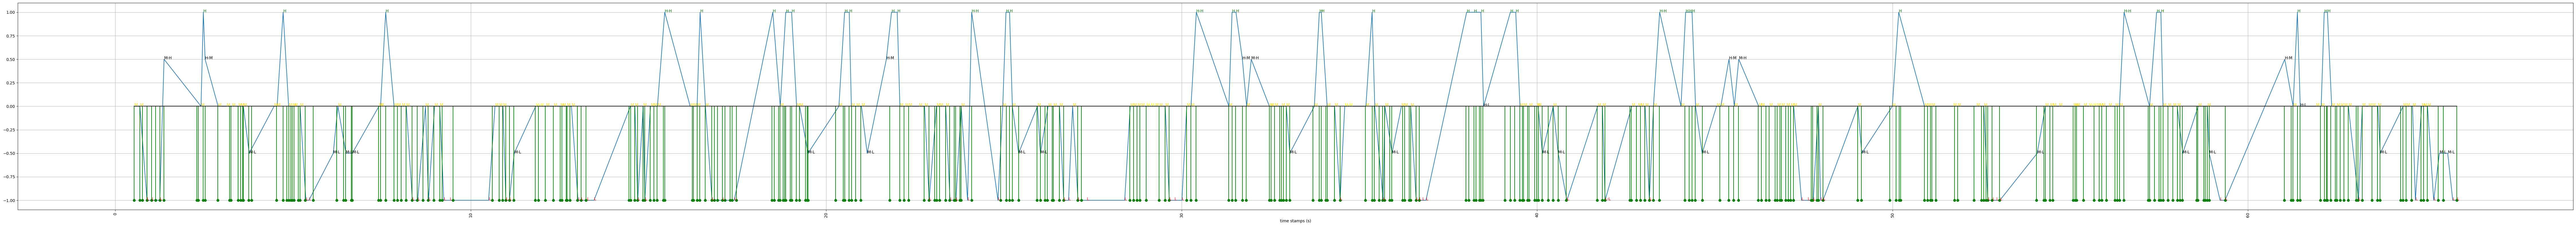

In [21]:
plt.figure(figsize=(90, 8))
list_x = list(labelled_rows.keys())
x = [float(j) for j in list_x]

# Plot the line plot
plt.plot(x, y_array)

# Plot the stem plot with color
plt.stem(vop_t, (-1)*np.ones(vop_t.shape), linefmt='go', markerfmt='go', basefmt='k-')

# Define color dictionary
color_dict = {'L': 'red', 'M': 'gold', 'H': 'green', 'L-L': 'red', 'M-M': 'yellow', 'H-H': 'green'}

# Add text labels with colors
count = 0
for row in x:
    color = color_dict.get(labelled_rows["{:.3f}".format(row)], 'black')
    plt.text(row, y_array[count], labelled_rows["{:.3f}".format(row)], color=color)
    count += 1

plt.xlabel("time stamps (s)")
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()

# Save the figure
plt.savefig("./plots/" + name + "_prosogram.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


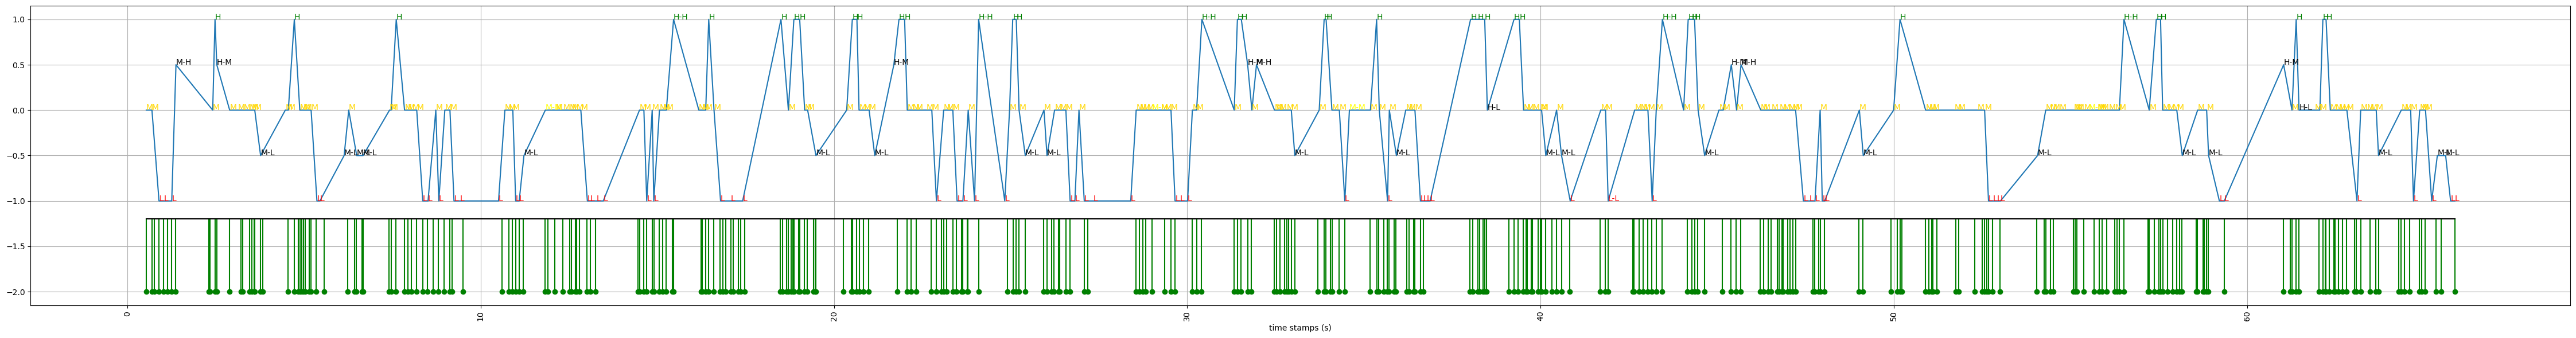

In [25]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(45, 6))

# # Assuming you have defined vop_t and y_array somewhere in your code
# vop_t = np.array([your_vop_values_here])
# y_array = np.array([your_y_array_values_here])

list_x = list(labelled_rows.keys())
x = [float(j) for j in list_x]

# Plot the line plot
plt.plot(x, y_array)

# Plot the stem plot with color, set the baseline to -2
plt.stem(vop_t, -2 * np.ones(vop_t.shape), linefmt='go', markerfmt='go', basefmt='k-',bottom=-1.2)

# Define color dictionary
color_dict = {'L': 'red', 'M': 'gold', 'H': 'green', 'L-L': 'red', 'M-M': 'yellow', 'H-H': 'green'}

# Add text labels with colors
count = 0
for row in x:
    color = color_dict.get(labelled_rows["{:.3f}".format(row)], 'black')
    plt.text(row, y_array[count], labelled_rows["{:.3f}".format(row)], color=color)
    count += 1

plt.xlabel("time stamps (s)")
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()

# Save the figure
plt.savefig("./plots/" + name + "_prosogram.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()
